Contents:
===
<ol>
<li><b>Business model</b></li>
<li><b>Problem Statement</b></li>
<li><b>Data Exploration</b></li>
<li><b>Data Cleaning</b></li>
<li><b>Model Building</b></li>
<li><b>Validation</b></li>
</ol>


Business model
===

Direct mail is a form of direct marketing in which businesses send letters, postcards or other promotional materials to past, current or potential customers or clients. Direct mail campaigns may be targeted to either a consumer or business market (or both).  In many cases, the mailing is directed to a target demographic or geographic market. In most cases, it's mass or bulk mailing, but you can send direct mail in smaller quantities as well.

Often, people think only in terms of ads when considering direct mail. But there are several different ways a home business could use direct mail to build a home business including:

1) Catalog of products and services: Let prospects see everything you have to offer by sending them a catalog or list of what you offer. Consider including a coupon to encourage them to buy.

2) Discounts and specials: Instead of just sending a card or letter introducing your product or service, why not include a special deal such as percentage off for first-time customers? People like a good deal and it's a great way to entice prospects to learn more about your business.

3) Useful items or tips: Realtors often send their clients and customers calendars and recipes. People who receive these items will keep them because they offer something helpful or useful, and it keeps the realtor's name in their mind because they're reminded of it each time they refer to the calendar or recipe. You can do the same. Just make sure that what you send is something people would want to keep and fits with your business. 

4) Reminders: Depending on your product or service, it can be beneficial to send your clients and customers reminders. For example, if you have a tax preparation business, you might send reminders out in December about deductions to take before the year ends or something similar. 

5) Samples: If it's not cost prohibitive, why not send a send a sample of your product or offer a free sample to anyone who responds to your mailing? People like to receive free items and to test products before buying. Sending them a sample gives them both. 

6) Announcements: If you're launching a new product or service, let your existing clients and customers, and prospects know about it. Again, this would be a good time to include a discount to encourage them to check out the new product or service.

7) Newsletter: While email newsletters is the most affordable way to deliver information regularly to your list, print and mail news can be effective as well. Through it you can combine many of the above ideas such as list of products or services, discounts, useful tips, and announcements.

<b>Advantages of using a direct mail marketing strategy:</b>

1) Effective at getting a response if well-written and targeted.

2) Bulk mailing costs less than regular mail.

<b>Disadvantages of using direct mail:</b>

1) Many consumers throw direct mail items away as "junk mail."

2) Costly especially if the mailing doesn't lead to results.



Problem statement
===

In this situation, an insurance company needs to come up with a good marketing strategy, so they want to run an e-mail campaign. Before sending the mail to all the available e-mail addresses in storage, they realize that they should first build a predictive model to identify the customers who are most likely to respond.

Hence, the problem statement would be to build a prediction model in which, on training the model to detect certain features, should be able to predict how likely any potential customer responds to marketing e-mails sent by the company.

The model building is being done using the R programming language, due to:

1) Being open-source software, allowign anyone to use or modify it.

2) Being cross-platform.

3) Having a large number of packages for statistical computing.

4) Having extensive graphical capabilities.

5) Having large number of active user groups.


Data Exploration
===

We first import the required input file into the project, using the read.delim() function, so that any delimited input file like a .txt file can be processed. We store this input in an R object named 'direct', to be used throughout the modeling.

In [1]:
direct <- read.delim("direct_mail_training.txt")

We then perform some initial operations on the dataset imported.

We use the str() fucntion. This function compactly displays the internal structure of an R object, giving the viewer a breakdown of the classes of variables in the dataset as well as number of observations. This is well suited to compactly display the abbreviated contents of (possibly nested) lists.

In [2]:
str(direct)

'data.frame':	29904 obs. of  26 variables:
 $ AGE    : int  20 18 19 18 18 19 19 20 19 19 ...
 $ CRED   : int  543 445 423 416 522 467 334 519 480 309 ...
 $ MS     : Factor w/ 3 levels "M","U","X": 2 2 2 3 2 2 3 2 1 2 ...
 $ HEQ    : num  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 ...
 $ INCOME : int  20 20 20 20 20 20 20 20 20 20 ...
 $ DEPC   : Factor w/ 2 levels "N","Y": 1 1 1 1 2 2 1 1 1 2 ...
 $ MOB    : Factor w/ 2 levels "N","Y": 2 2 1 2 2 1 2 2 2 2 ...
 $ MILEAGE: num  14.418 0.311 17.876 17.084 16.51 ...
 $ RESTYPE: Factor w/ 4 levels "CONDO","COOP",..: 3 3 3 3 3 3 4 3 4 3 ...
 $ GENDER : Factor w/ 2 levels "F","M": 2 2 2 1 1 1 2 2 2 2 ...
 $ EMP_STA: Factor w/ 3 levels "0","1,2","3+": 2 1 2 2 2 2 2 2 3 2 ...
 $ RES_STA: Factor w/ 2 levels "1,2","3+": 1 1 1 1 1 1 1 1 1 1 ...
 $ DELINQ : int  0 2 1 0 1 0 0 4 4 0 ...
 $ NUMTR  : int  2 2 0 0 0 0 1 3 1 0 ...
 $ MRTGI  : Factor w/ 3 levels "N","U","Y": 1 3 3 3 3 3 1 2 1 3 ...
 $ MFDU   : int  0 0 0 0 0 0 1 0 1 0 ...
 $ resp   : int 

We use the head() and tail() functions to display the first few as well as the last few entries of the dataset.

In [3]:
head(direct)

AGE,CRED,MS,HEQ,INCOME,DEPC,MOB,MILEAGE,RESTYPE,GENDER,...,resp,female,HOME,CONDO,COOP,renter,emp1,emp2,msn,cuscode
20,543,U,0.1,20,N,Y,14.418,HOME,M,...,0,0,1,0,0,1,1,0,0,1
18,445,U,0.1,20,N,Y,0.311,HOME,M,...,0,0,1,0,0,1,0,0,0,2
19,423,U,0.1,20,N,N,17.876,HOME,M,...,0,0,1,0,0,1,1,0,0,3
18,416,X,0.1,20,N,Y,17.084,HOME,F,...,0,1,1,0,0,1,1,0,0,4
18,522,U,0.1,20,Y,Y,16.510,HOME,F,...,0,1,1,0,0,1,1,0,0,5
19,467,U,0.1,20,Y,N,16.239,HOME,F,...,0,1,1,0,0,1,1,0,0,6


In [4]:
tail(direct)

,AGE,CRED,MS,HEQ,INCOME,DEPC,MOB,MILEAGE,RESTYPE,GENDER,...,resp,female,HOME,CONDO,COOP,renter,emp1,emp2,msn,cuscode
29899,59,1789,M,0.1,70,N,Y,9.917,HOME,M,...,0,0,1,0,0,1,1,0,1,29899
29900,56,1789,M,30.0,30,Y,Y,17.302,COOP,F,...,0,1,0,0,1,1,1,0,1,29900
29901,58,1789,U,30.0,40,Y,N,10.509,HOME,M,...,0,0,1,0,0,1,1,0,0,29901
29902,64,1789,M,30.0,40,Y,N,4.749,RENTER,F,...,0,1,0,0,0,1,1,0,1,29902
29903,64,1789,M,30.0,40,Y,Y,11.110,HOME,F,...,0,1,1,0,0,1,1,0,1,29903
29904,68,1789,M,90.0,40,N,Y,18.653,HOME,M,...,0,0,1,0,0,1,1,0,1,29904


> <h3><b>Univariate analysis</b></h3>

Univariate analysis is the simplest form of analyzing data. 'Uni' means 'one'; in other words we examine the dataset one variable at a time. It doesn’t deal with causes or relationships (unlike regression) and it’s major purpose is to describe; it takes data, summarizes that data and finds patterns in the data.

Methods to perform univariate analysis depends on whether the variable is continuous or categorical.

If it is a continuous variable, central tendency (i.e., mean, median, mode, etc.) and spread of the variable or dispersion (i.e., range, quartile, variance, skewness-kurtosis etc.) is used. These can be measured using various statistical metrics. Boxplot can be used for visulisation.

If it is a categorical variable, frequency tables are used for analysis. Count of each variable and/or percentage count helps us understand categorical data. Bar charts can be used for visulisation.

We perform univariate anaylsis for each variable in the dataset by making use of the <b>summary()</b>, <b>quantile()</b>, <b>ggplot()</b>, <b>qplot()</b> and <b>table()</b> functions.

<b>summary()</b> is used to obtain a detailed description of the variable passed to it. The details it displays include range, quartiles, mean, median, frequencies, and can also indicate any missing values.

<b>quantile()</b> is used to obtain the distribution of the values in the dataset, based on the percentile values given by the user.

<b>ggplot()</b> is used to initialize a 'ggplot' object. It can be used to declare the input data frame for graphical notation. In this case, we create an aethetics mapping as well as a geometric box-and-whiskers plot using this function.

Aesthetic mappings describe how variables in the data are mapped to visual properties (aesthetics) of geoms.

The boxplot compactly displays the distribution of a continuous variable. It visualises the five summary statistics (the median, two hinges and two whiskers), and all outlying points individually.

<b>qplot()</b> can be used to create the most common graph types. While it does not expose <b>ggplot()</b>'s full power, it can create a very wide range of useful plots.

<b>table()</b> uses the cross-classifying factors to build a contingency table, an object of class 'table' (an array of integer values), of the counts at each combination of factor levels.

> <b>For the variable AGE:</b>

AGE is used to find the overall distribution of the customers based on their age, whether he/she comes within the appropriate domain for a particular marketing implementation.

In [5]:
summary(direct$AGE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   18.0    36.0    50.0    49.3    61.0    90.0 

> <b>For the variable CRED:</b>

CRED is the credit score of the customer, which is is a numerical expression based on a level analysis of a person's credit files, to represent the credit-worthiness of an individual.

Lenders, such as banks and credit card companies, use credit scores to evaluate the potential risk posed by lending money to consumers and to mitigate losses due to bad debt. Lenders use credit scores to determine who qualifies for a loan, at what interest rate, and what credit limits. Lenders also use credit scores to determine which customers are likely to bring in the most revenue.

However, credit scoring is not limited to banks. Other organizations, such as mobile phone companies, landlords, government departments, or in our case insurance companies, employ the same techniques. In this situation, the credit score would be used to determine whether a potential customer would be financially able to respond to a marketing strategy.

In [6]:
summary(direct$CRED)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  300.0   574.0   617.0   603.6   652.0  1789.0      33 

In [7]:
quantile(direct$CRED,c(0.8,0.85,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99) ,na.rm = TRUE)

80%   85%   91%   92%   93%   94%   95%   96%   97%   98%   99% 
662.0 671.0 693.0 700.0 708.0 715.0 725.5 736.0 746.0 757.0 863.3

Warning message:
"package 'ggplot2' was built under R version 3.3.3"Warning message:
"Removed 33 rows containing non-finite values (stat_boxplot)."

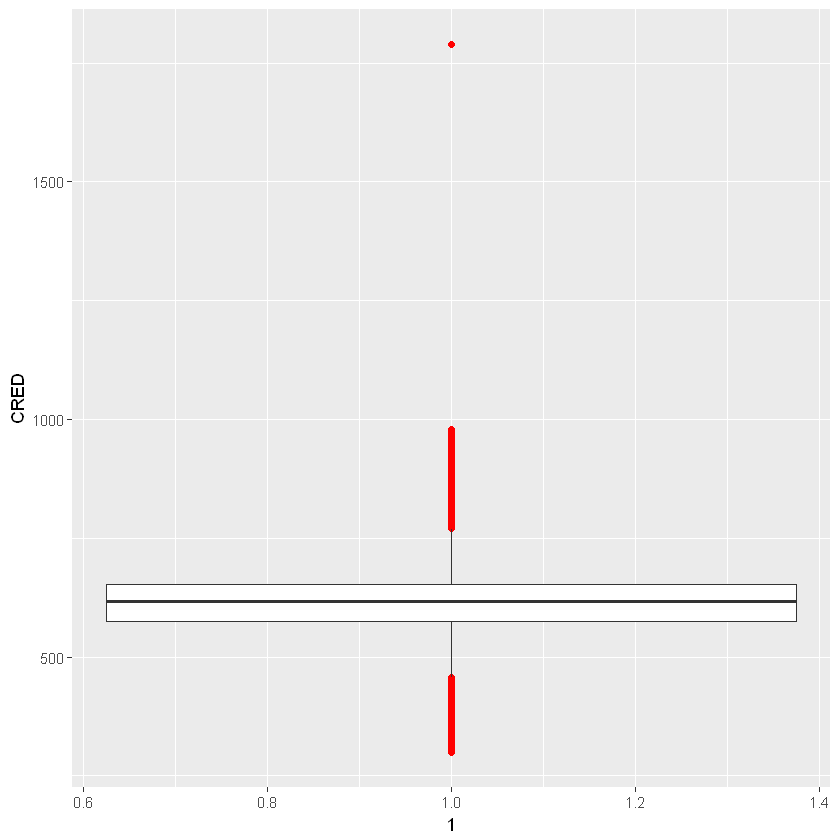

In [8]:
library(ggplot2)
ggplot(direct,aes(y=CRED,x=1))+geom_boxplot(outlier.colour= "red")

There seem to be both outliers as well as missing values.

> <b>For the variable INCOME:</b>

INCOME is used in similar manner as the credit score, to determine whether a potential customer is financially able to respond to a marketing strategy.

In [9]:
summary(direct$INCOME)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20.00   30.00   40.00   41.36   50.00  110.00 

In [10]:
quantile(direct$INCOME,c(0.8,0.85,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99) ,na.rm = TRUE)

80% 85% 91% 92% 93% 94% 95% 96% 97% 98% 99% 
 50  50  60  60  60  60  70  70  70  70 110

There are no missing values, but there seem to be some outliers which can be removed

> <b>For the variable DEPC:</b>

DEPC denotes market depreciation, which measures the decrease or loss of value of an asset, because of age, wear or market conditions. It can also be taken as an allowance made for the loss of value.

In this case, the variable DEPC is a 'YES'/'NO' type variable, so using the summary() function gives us the count of both YESs as well as NOs.

In [11]:
summary(direct$DEPC)

N     Y 
18502 11402

> <b>For the variable MOB:</b>

MOB indicates whether the customer being sent the marketing e-mail has previously used the company's services or not, which is again denoted in a 'YES'/'NO' manner.

In [12]:
summary(direct$MOB)

N     Y 
11340 18564

> <b>For the variable MILEAGE:</b>

MILEAGE is used to track the mileage of a potential customer's vehicle. Depending on the product being marketed, this may also give some insight into the customer's behavioural patterns.

In [13]:
summary(direct$MILEAGE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   7.776  12.540  11.800  16.190  94.640 

In [14]:
quantile(direct$MILEAGE,c(0.8,0.85,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99) ,na.rm = TRUE)

80%      85%      91%      92%      93%      94%      95%      96% 
16.98900 17.79410 18.72500 18.86676 19.01679 19.17064 19.32485 19.47500 
     97%      98%      99% 
19.62591 19.78100 19.93300

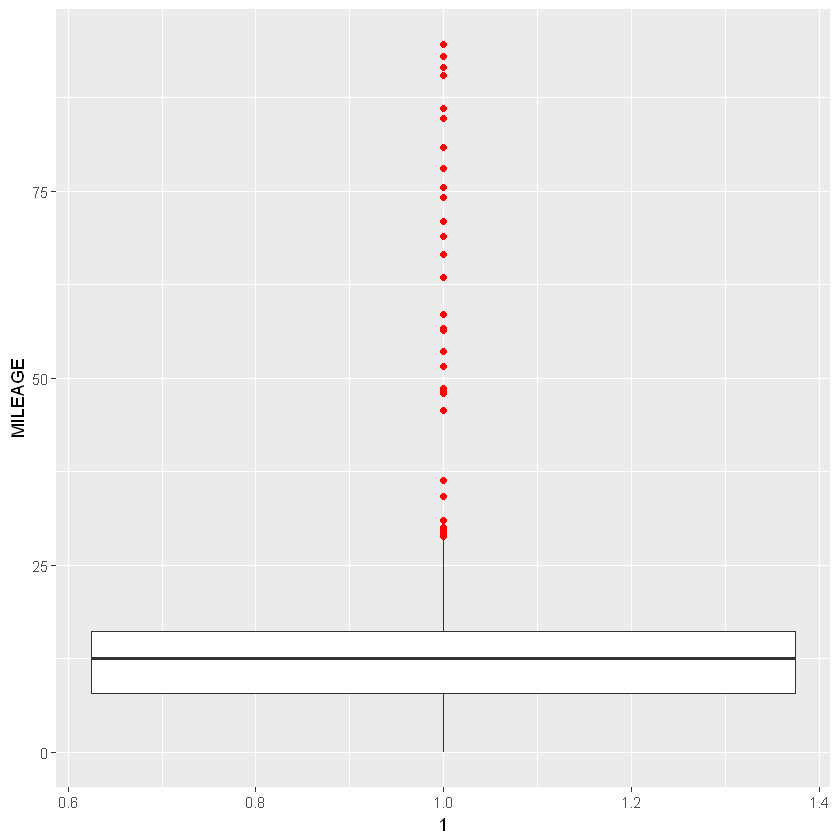

In [15]:
ggplot(direct,aes(y=MILEAGE,x=1))+geom_boxplot(outlier.colour= "red")

There seem to be no missing values or outliers.

> <b>For the variable RESTYPE:</b>

RESTYPE is used to denote the type of home a potential customer may live in. It may be something they own, like an independent house or an apartment flat, it may be something that they rent, etc. This gives us a clue about his/her financial status and stability.

In [16]:
summary(direct$RESTYPE)

CONDO   COOP   HOME RENTER 
   566    885  16365  12088

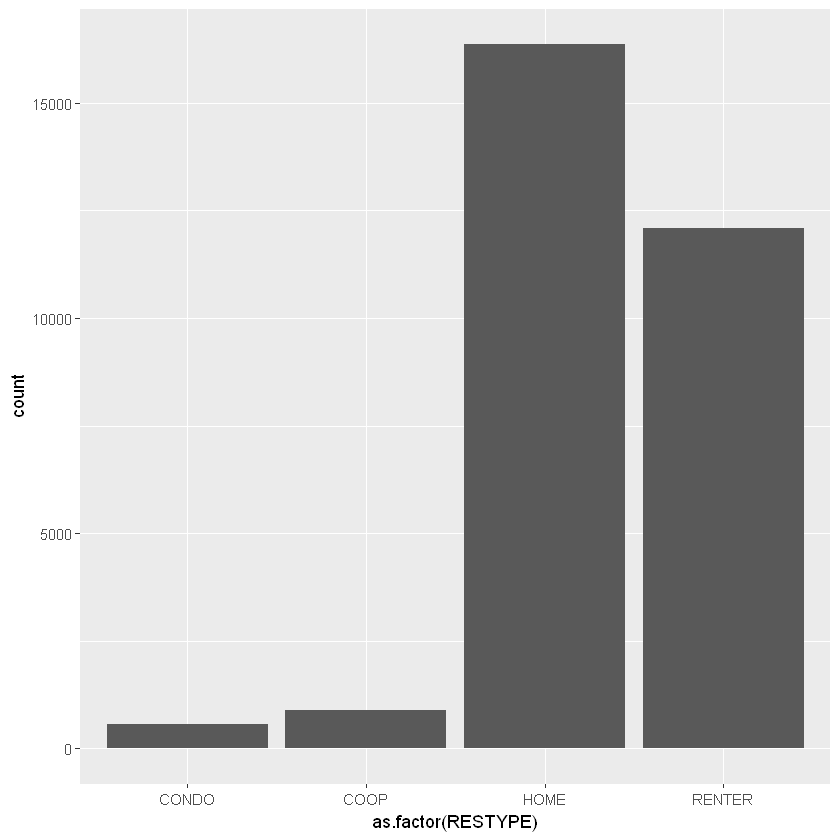

In [17]:
qplot(as.factor(RESTYPE),data = direct)

There seem to be no missing values or outliers.

> <b>For the variable EMP_STA:</b>

EMP_STA denotes the employer status, which indicates the number of jobs the customer is currently working. This can give a direct correlation over their financial status.

In [18]:
summary(direct$EMP_STA)

0   1,2    3+ 
  968 27146  1790

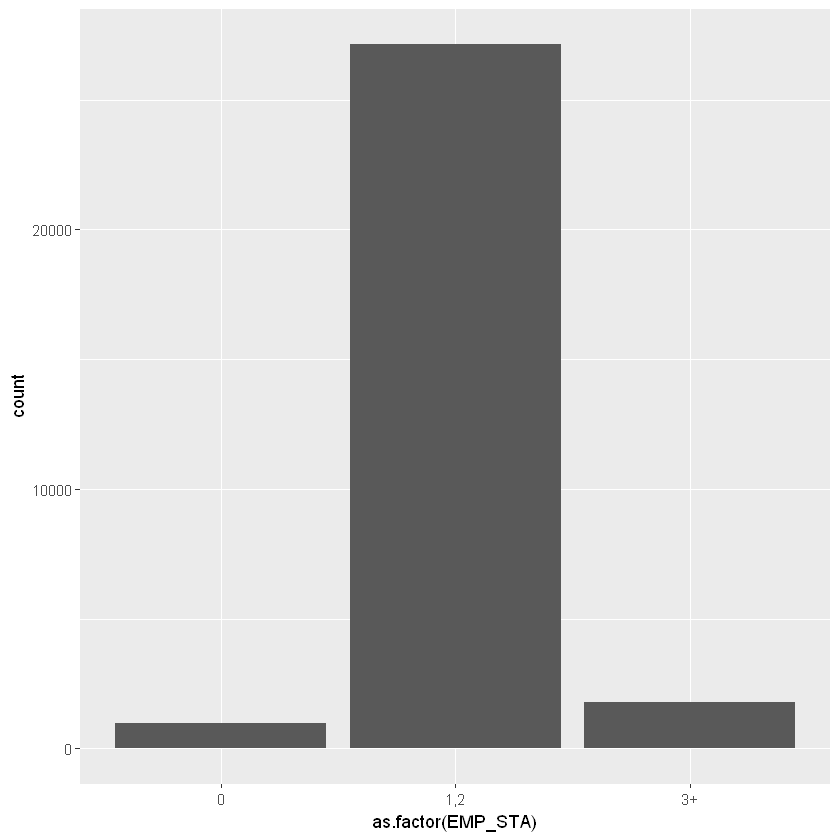

In [19]:
qplot(as.factor(EMP_STA),data = direct)

There seem to be no missing values or outliers.

> <b>For the variable DELINQ:</b>

DELINQ is used to indicate the delinquency status of a potential customer, a variable that helps the company choose their candidates more carefully.

In [20]:
summary(direct$DELINQ)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.7662  1.0000  7.0000 

In [21]:
quantile(direct$DELINQ,c(0.8,0.85,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99))

80% 85% 91% 92% 93% 94% 95% 96% 97% 98% 99% 
  2   2   3   3   3   3   3   3   4   4   4

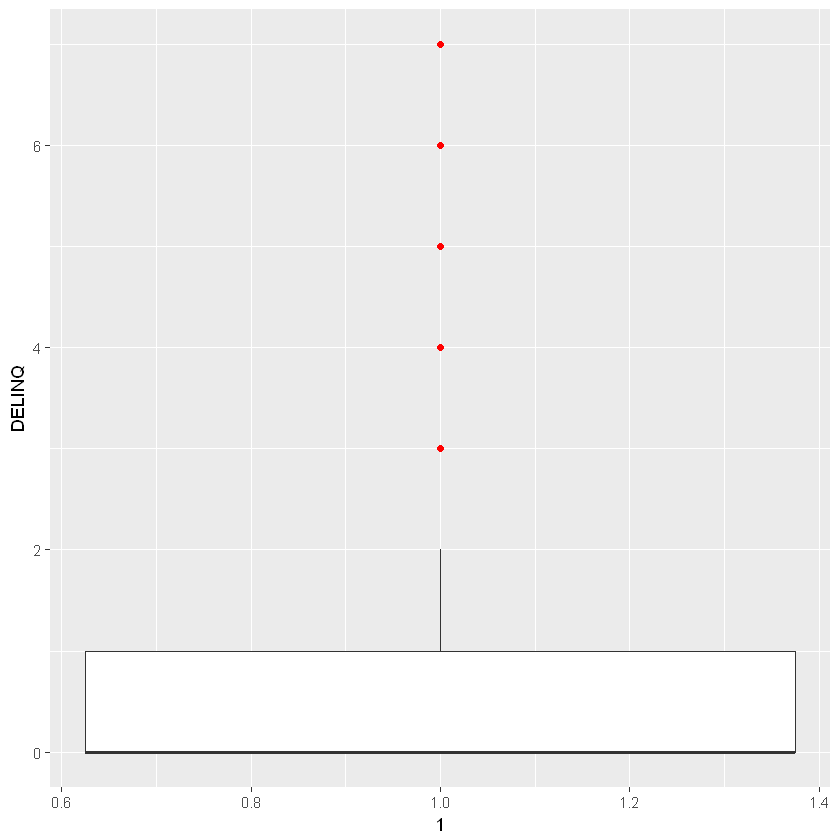

In [22]:
ggplot(direct,aes(y=DELINQ,x=1))+geom_boxplot(outlier.colour= "red")

There seem to be no missing values, but there are few outliers which can be considered.

> <b>For the variable NUMTR:</b>

NUMTR stands for number of trades actively being done by the customer, which gives a measure of how successful he/she is at his/her chosen profession, and by extension, his/her financial stability.

In [23]:
summary(direct$NUMTR)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.7633  1.0000  7.0000 

In [24]:
quantile(direct$NUMTR,c(0.8,0.85,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99))

80% 85% 91% 92% 93% 94% 95% 96% 97% 98% 99% 
  2   2   3   3   3   3   3   3   4   4   4

There seem to be no missing values, but there are few outliers which can be considered.

> <b>For the variable MRTGI:</b>

MRTGI denotes whether a potential customer has given any property he/she owns for mortgage, which could indicate lesser income. It is denoted by a 'YES'/'NO'/'UNDEFINED' type variable.

In [25]:
summary(direct$MRTGI)

N     U     Y 
17484  1763 10657

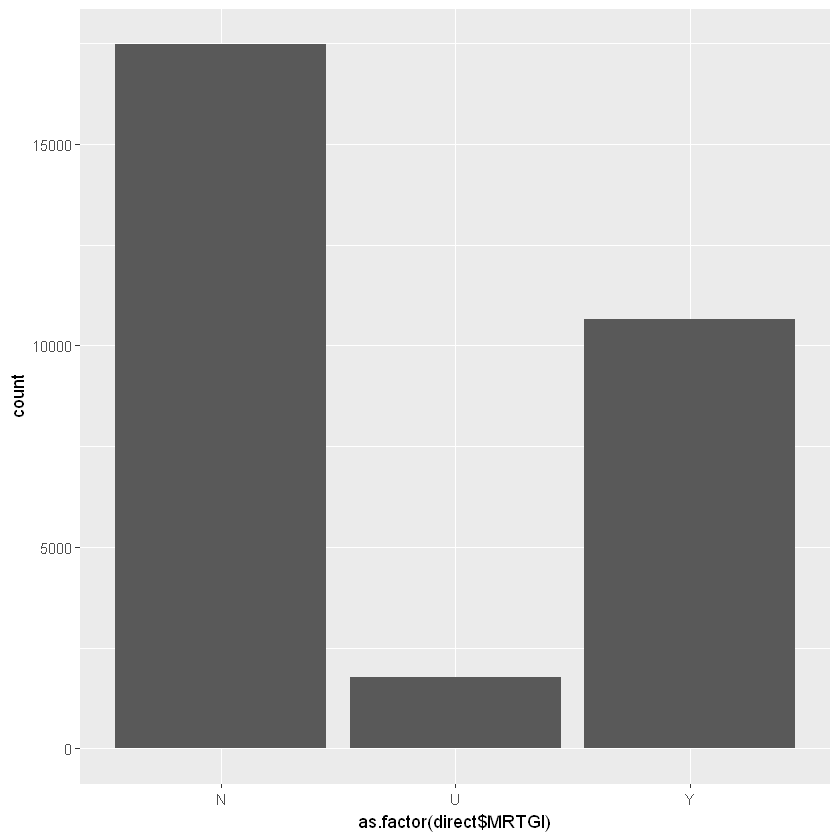

In [26]:
qplot(as.factor(direct$MRTGI),data = direct)

> <b>For the variable MFDU:</b>

MFDU indicates whether a customer has multiple family dwelling units, i.e., if he/she owns multiple homes where family members reside.

In [27]:
summary(direct$MFDU)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.4527  1.0000  1.0000 

In [28]:
table(direct$MFDU)


    0     1 
16365 13539 

> <b>For the variable RESP:</b>

RESP indicates the response measure.

In [29]:
summary(direct$resp)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.09554 0.00000 1.00000 

In [30]:
table(direct$resp)


    0     1 
27047  2857 

> <b>For the variable Female:</b>

Female is used to indicate whether a potential customer is a woman or not.

In [31]:
summary(direct$female)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.4223  1.0000  1.0000 

In [32]:
table(direct$female)


    0     1 
17276 12628 

> <b>For the variable msn:</b>

msn is used to indicate whether the customer is enrolled with the Medical Safety Net program, i.e., whether he/she possesses some sort of medical insurance policy.

In [33]:
summary(direct$msn)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  1.0000  0.5759  1.0000  1.0000 

In [34]:
table(direct$msn)


    0     1 
12683 17221 

Data Cleaning
===

This mostly involves the treating of missing values and outliers. 'NA' stands for 'Not Available', and is the placeholder used by most statistical programming languages to denote values that have not been entered, or that could not be read from the input dataset. Similarly, 'NaN' stands for 'Not A Number', and is used to denote values which result from impossible mathematical operations, like dividing a number by zero.

Missing values may occur at two stages:
<ul>

<li><b>Data Extraction:</b></li>

It is possible that there are problems with extraction process. In such cases, we should double-check for correct data with data guardians. Some hashing procedures can also be used to make sure data extraction is correct. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
<br><br>
<li><b>Data collection:</b></li>

These errors occur at time of data collection and are harder to correct. They can be categorized in four types:
<ul>
<li>Missing completely at random: This is a case when the probability of missing variable is same for all observations. Ex: respondents of data collection process decide that they will declare their earning after tossing a fair coin. If an head occurs, respondent declares his/her earnings & vice versa. Here each observation has equal chance of missing value.</li>

<li>Missing at random: This is a case when variable is missing at random and missing ratio varies for different values/level of other input variables. For example: We are collecting data for age and female has higher missing value compare to male.</li>

<li>Missing that depends on unobserved predictors: This is a case when the missing values are not random and are related to the unobserved input variable. For example: In a medical study, if a particular diagnostic causes discomfort, then there is higher chance of drop out from the study. This missing value is not at random unless we have included “discomfort” as an input variable for all patients.</li>

<li>Missing that depends on the missing value itself: This is a case when the probability of missing value is directly correlated with missing value itself. For example: People with higher or lower income are likely to provide non-response to their earning.</li>
</ul></ul>
There are various methods to treat missing values:
<ul>
<li><b>Deletion:</b></li>

It is of two types: list-wise deletion and pair-wise deletion.
<ul>
<li>List-wise deletion: We delete the observations where any of the variables is missing. Simplicity is one of the major advantage of this method, but this also reduces the power of model, because it reduces the sample size.</li>

<li>Pair-wise deletion: We perform analysis with all cases in which the variables of interest are present. The advantage of this method is that it keeps as many cases available as possible, for analysis. The disadvantage of this method is that it uses different sample size for different variables.</li>
</ul>
<br>
<li><b>Mean/mode/median imputation:</b></li>
Imputation is a method to fill in the missing values with estimated ones. The objective is to employ known relationships that can be identified in the valid values of the data set to assist in estimating the missing values. Mean / Mode / Median imputation is one of the most frequently used methods. It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable. It can be of two types:-
<ul>
<li>Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.</li>
<li>Similar case Imputation: In this case, we calculate average for each type of value of non missing values individually, then replace the missing value based on it.</li>
</ul>
<br>
<li><b>Prediction Model:</b></li>

Prediction model is one of the more sophisticated methods for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.
</ul>

In this situation, we decide to remove the NAs, rather than replace them with the mean/mode/median or use a prediction model. The decision to remove them was taken since removal of NAs is the simplest option to implement.

The functions used here are is.na() and mean()
<ul>
<li><b>is.na()</b> checks if a particular variable contains NAs or not</li>
<li><b>mean()</b> calculates the mean of the specified variable</li>
</ul>

The variable $CRED had a lot of missing values, we decide to treat it by removal:

In [35]:
direct$CRED = ifelse(is.na(direct$CRED),mean(direct$CRED,na.rm = TRUE),direct$CRED)

After removal of NAs, we create a table for the variable $RESP:

In [36]:
table(direct$resp)


    0     1 
27047  2857 

Here, it is evident that there is not enough data such that the number of ones is comparable with the number of zeroes. This is called an imbalanced class problem.

<b>Imbalanced classification:</b> It is a supervised learning problem where one class outnumbers other class by a large proportion. This problem is faced more frequently in binary classification problems than multi-level classification problems.

The term imbalanced refer to the disparity encountered in the dependent (response) variable. Therefore, an imbalanced classification problem is one in which the dependent variable has imbalanced proportion of classes. In other words, a dataset that exhibits an unequal distribution between its classes is considered to be imbalanced.

The methods to deal with imbalanced classification are widely known as sampling methods. Generally, these methods aim to modify an imbalanced data into balanced distribution using some mechanism. The modification occurs by altering the size of original data set and provide the same proportion of balance.

These methods have acquired higher importance after many researches have proved that balanced data results in improved overall classification performance compared to an imbalanced data set. Hence, it’s important to learn them.

Below are the methods used to treat imbalanced datasets:
<ul>
<li>Undersampling: using a bias function to select more samples from the smaller distribution in the dataset</li>
<li>Oversampling: using a bias functino to select less samples from the larger distribution in the dataset</li>
<li>Synthetic Data Generation: creating data that has not been obtained by direct measurement</li>
<li>Cost Sensitive Learning: using a confusion/cost matrix to determine the misclassification error</li>
</ul>

In this case, we use the oversampling method to increase the samples of ones (since zeroes far outnumber ones) taken from the dataset.

The function used is <b>ovun.sample()</b>, which can either perform random oversampling, random undersampling, or a combination of both, based on the parameters specified.

In [37]:
library(ROSE)
data_over <- ovun.sample(resp~ AGE+CRED+MS+HEQ+INCOME+DEPC+MOB+MILEAGE+RESTYPE+GENDER+EMP_STA+RES_STA+DELINQ+NUMTR+MRTGI+MFDU, data =direct, method = "over", p=0.30, seed = 1)$data

Warning message:
"package 'ROSE' was built under R version 3.3.3"Loaded ROSE 0.0-3



This should help in building a more balanced model.

Model building
===

After the removal of NAs and the treatment of the imbalanced class problem, we now begin builing the prediction model.

First, we split the data into two sets: training set and testing set, based on a split ratio.
<ul>
<li>The training set is a set of data used to discover potentially predictive relationships</li>
<li>The testing set  is a set of data used to assess the strength and utility of a predictive relationship</li>
</ul>

The functions are:
<ul>
<li><b>sample.split()</b> is used to split a given dataset based on a specified split condition and a split ratio</li>
<li><b>subset()</b> is used to select all the values of a dataset which satisfy the criteria given</li>
</ul>

In [38]:
library(caTools)
spl = sample.split(data_over$resp, SplitRatio = 25/150)
training = subset(data_over, spl==FALSE)
testing = subset(data_over, spl==TRUE)

Warning message:
"package 'caTools' was built under R version 3.3.3"

We now build a model using the <b>glm()</b> function, which can handle a variety of linear models. In this case we build a logistic regression model.

In [39]:
model= glm(resp ~ AGE+CRED+MS+HEQ+INCOME+DEPC+MOB+MILEAGE+RESTYPE+GENDER+EMP_STA+RES_STA+DELINQ+NUMTR+MRTGI+MFDU, family = binomial(logit), data = training)

We assign the predicted values to a variable by using a threshold function:
<ul>
<li>If the value is below the threshold value, consider it as a zero.</li>
<li>If the value is above the threshold value, consider it as a one.</li>
</ul>

We also assign the actual values to another variable.

The <b>predict()</b> function is used to compute all the model predictors in the dataset, that satisfy the condition given.

In [40]:
predicted_values<-ifelse(predict(model,testing)>0.5,1,0)
actual_value<-testing$resp

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

A confusion matrix is created, that shows the predicted and actual value count, hence showing the distribution of zeroes and ones that were predicted as well as that are actual.

In [41]:
confusion_matrix<-table(actual_value, predicted_values)
confusion_matrix

            predicted_values
actual_value    0    1
           0 4498   10
           1 1909   19

The accuracy of the model is calculated, using the confusion matrix values. Accuracy is defined as the percentage of correct values that the model has achieved.

In [42]:
accuracy<-(confusion_matrix[1,1]+confusion_matrix[2,2])/(sum(confusion_matrix))
accuracy

[1] 0.7018334

However, accuracy alone is not good enough to determine the efficiency of the model. Consider how results are marked as either correct or incorrect:
<ul>
<li><b>True Positive (TP)</b>: Some values which are supposed to be a one, are marked correctly as a one.</li>
<li><b>False Positive (FP)</b>: Some values which are supposed to be a zero, are marked incorrectly as a one.</li>
<li><b>True Negative (TN)</b>: Some values which are supposed to be a zero, are marked correctly as a zero.</li>
<li><b>False Negative (FN)</b>: Some values which are supposed to be a one, are marked incorrectly as a zero.</li>
</ul>

There may arise situations where the TP or TN value count is less than the FP or FN value count, respectively. In such a case, despite having less number of correct values, we find that accuracy increases, since accuracy is defined as:

<b><i>Accuracy</i> = <i>(TP + TN)</i> / <i>(TP + FP + TN + FN)</i></b>

This is called the accuracy paradox.

Therefore, two other metrics are defined to describe the efficiency of the model: sensitivity and specificity.

<ul>
<li>Sensitivity is the percentage of positive values that are identified as a positive (when a one is correctly identified as a one)</li>
<li>Specificity is the percentage of negative values that are identified as a negative (when a zero is correctly identified as a zero).</li>
</ul>

<b><i>Sensitivity</i> = <i>TP</i> / <i>(TP + FN)</i></b> and <b><i>specificity</i> = <i>TN</i> / <i>(TN + FP)</i></b>.

In [43]:
sensitivity<-confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[1,2])
sensitivity

specificity<-confusion_matrix[2,2]/(confusion_matrix[2,1]+confusion_matrix[2,2])
specificity

[1] 0.9977817

[1] 0.009854772

We see that sensitvity is quite high, at 0.997781721384206, while specificity is comapratively very low, at 0.00985477178423236.

Next, we try a different approach to the model building process, by constructing a decision tree using the dataset variables as input. This is done to see if we can achieve a better result using a different model:

The <b>rpart()</b> and <b>rpart.plot()</b> functions are used to create a decision tree based on the parameters. The value CP stands for Complexity Parameter, and is used to control the size of the tree during the building process.

Warning message:
"package 'rpart' was built under R version 3.3.3"Warning message:
"package 'rpart.plot' was built under R version 3.3.3"


Classification tree:
rpart(formula = resp ~ AGE + CRED + MS + HEQ + INCOME + DEPC + 
    MOB + MILEAGE + RESTYPE + GENDER + EMP_STA + RES_STA + DELINQ + 
    NUMTR + MRTGI + MFDU, data = training, method = "class", 
    control = rpart.control(minsplit = 30, cp = 0.001))

Variables actually used in tree construction:
 [1] AGE     CRED    DELINQ  DEPC    GENDER  HEQ     INCOME  MILEAGE MS     
[10] NUMTR   RESTYPE

Root node error: 9640/32179 = 0.29957

n= 32179 

         CP nsplit rel error  xerror      xstd
1 0.0033454      0   1.00000 1.00000 0.0085240
2 0.0026971      5   0.98299 0.99741 0.0085176
3 0.0020401      6   0.98029 0.98890 0.0084966
4 0.0014523      9   0.97417 0.98143 0.0084779
5 0.0013226     12   0.96981 0.97811 0.0084695
6 0.0012448     16   0.96452 0.97510 0.0084619
7 0.0011411     48   0.91317 0.96629 0.0084393
8 0.0010373     53   0.90612 0.95757 0.0084165
9 0.0010000     55   0.90405 0.95394 0.0084070


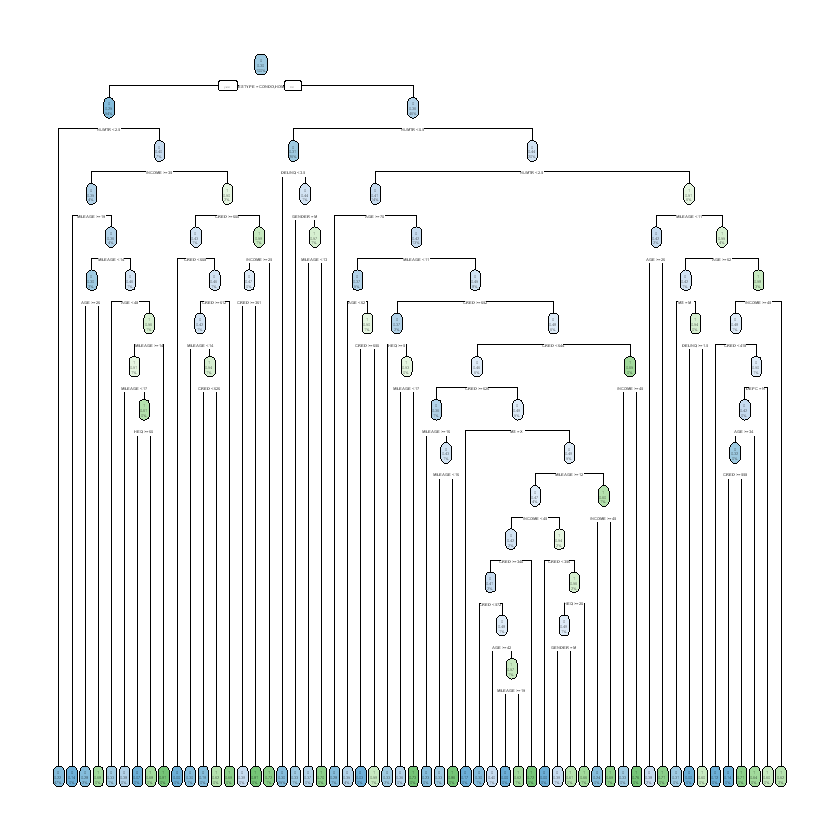

In [44]:
library(rpart)
library(rpart.plot)
tree=rpart(resp ~ AGE+CRED+MS+HEQ+INCOME+DEPC+MOB+MILEAGE+RESTYPE+GENDER+EMP_STA+RES_STA+DELINQ+NUMTR+MRTGI+MFDU,method = "class",control =rpart.control(minsplit = 30,cp=0.001),data = training)
rpart.plot(tree)
printcp(tree)

We continue this procedure till we get an optimal value of CP, which would then build a decision tree with the exact, required size. After multiple trails, we get an optimal CP value of 0.0012448. Building the decision tree using this value, we get:


Classification tree:
rpart(formula = resp ~ AGE + CRED + MS + HEQ + INCOME + DEPC + 
    MOB + MILEAGE + RESTYPE + GENDER + EMP_STA + RES_STA + DELINQ + 
    NUMTR + MRTGI + MFDU, data = training, method = "class", 
    control = rpart.control(minsplit = 30, cp = 0.0012448))

Variables actually used in tree construction:
 [1] AGE     CRED    DELINQ  DEPC    GENDER  HEQ     INCOME  MILEAGE MS     
[10] NUMTR   RESTYPE

Root node error: 9640/32179 = 0.29957

n= 32179 

         CP nsplit rel error  xerror      xstd
1 0.0033454      0   1.00000 1.00000 0.0085240
2 0.0026971      5   0.98299 0.99046 0.0085005
3 0.0020401      6   0.98029 0.98589 0.0084891
4 0.0014523      9   0.97417 0.98154 0.0084782
5 0.0013226     12   0.96981 0.97614 0.0084645
6 0.0012448     16   0.96452 0.96898 0.0084462
7 0.0012448     48   0.91317 0.96836 0.0084446


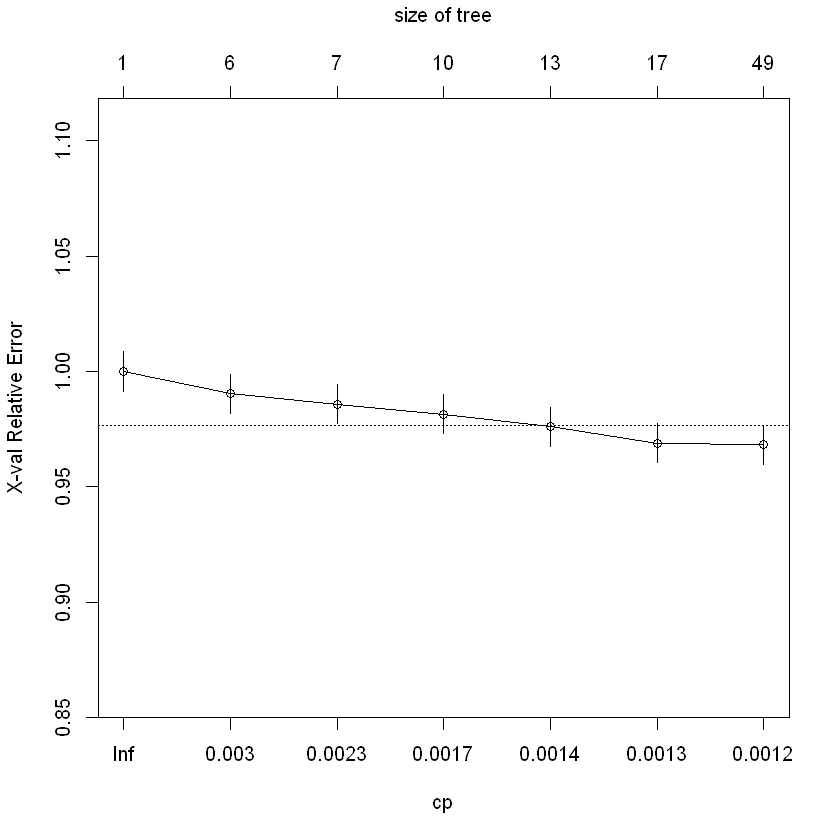

In [45]:
tree=rpart(resp ~ AGE+CRED+MS+HEQ+INCOME+DEPC+MOB+MILEAGE+RESTYPE+GENDER+EMP_STA+RES_STA+DELINQ+NUMTR+MRTGI+MFDU,method = "class",control =rpart.control(minsplit = 30,cp=0.0012448),data = training)
plotcp(tree)
printcp(tree)

We again compute the predictors (here, the different types of classes), build a confusion matrix using the predictors, and then calculate its accuracy; this time when the CP value is 0.0012448.

Validation
===

We finally come to the last step in the modelling process, i.e., validation. Here, we try to assess how well our mining models perform against real, independent datasets.

There are many approaches for assessing the quality and characteristics of a data mining model:
<ul>
<li>Use various measures of statistical validity to determine whether there are problems in the data or in the model.</li>
<li>Separate the data into training and testing sets to test the accuracy of predictions.</li>
<li>Ask business experts to review the results of the data mining model to determine whether the discovered patterns have meaning in the targeted business scenario</li>
</ul>

Here, we use the <i>k</i>-fold cross-validation method to do this. In this method, the original sample is randomly partitioned into <i>k</i> equal sized sub-samples. Of the <i>k</i> sub-samples, a single sub-sample is retained as the validation data for testing the model, and the remaining (<i>k</i> − 1) sub-samples are used as training data. The cross-validation process is then repeated <i>k</i> times (the folds), with each of the <i>k</i> sub-samples used exactly once as the validation data. The <i>k</i> results from the folds can then be averaged to produce a single estimation.

The functions used are:
<ul>
<li><b>train()</b> is used to evaluate, using resampling, the effect of model tuning parameters on performance and then choose the optimal model across these parameters</li>
<li><b>trainControl()</b> is used to control the computational parameters set by <b>train()</b></li>
<li><b>as.factor()</b> is used typically to convert numeric or character data into factor data</li>
</ul>

Training the dataset using cross-validation:

In [46]:
library(caret)
train <- trainControl(method="cv", number=10)
train
  
direct$resp<-as.factor(direct$resp)  
K_fold<-train(resp ~ AGE+CRED+MS+HEQ+INCOME+DEPC+MOB+MILEAGE+RESTYPE+GENDER+EMP_STA+RES_STA+DELINQ+NUMTR+MRTGI+MFDU, method="rpart", trControl=train, control=rpart.control(minsplit=10, cp=0.000001),  data=direct)

Warning message:
"package 'caret' was built under R version 3.3.3"Loading required package: lattice


$method
[1] "cv"

$number
[1] 10

$repeats
[1] 1

$search
[1] "grid"

$p
[1] 0.75

$initialWindow
NULL

$horizon
[1] 1

$fixedWindow
[1] TRUE

$skip
[1] 0

$verboseIter
[1] FALSE

$returnData
[1] TRUE

$returnResamp
[1] "final"

$savePredictions
[1] FALSE

$classProbs
[1] FALSE

$summaryFunction
function (data, lev = NULL, model = NULL) 
{
    if (is.character(data$obs)) 
        data$obs <- factor(data$obs, levels = lev)
    postResample(data[, "pred"], data[, "obs"])
}
<environment: namespace:caret>

$selectionFunction
[1] "best"

$preProcOptions
$preProcOptions$thresh
[1] 0.95

$preProcOptions$ICAcomp
[1] 3

$preProcOptions$k
[1] 5

$preProcOptions$freqCut
[1] 19

$preProcOptions$uniqueCut
[1] 10

$preProcOptions$cutoff
[1] 0.9


$sampling
NULL

$index
NULL

$indexOut
NULL

$indexFinal
NULL

$timingSamps
[1] 0

$predictionBounds
[1] FALSE FALSE

$seeds
[1] NA

$adaptive
$adaptive$min
[1] 5

$adaptive$alpha
[1] 0.05

$adaptive$method
[1] "gls"

$adaptive$complete
[1] TRUE


$trim
[1]

Converting the data to factor format:

In [47]:
direct$resp<-as.factor(direct$resp)  
K_fold<-train(resp ~ AGE+CRED+MS+HEQ+INCOME+DEPC+MOB+MILEAGE+RESTYPE+GENDER+EMP_STA+RES_STA+DELINQ+NUMTR+MRTGI+MFDU, method="rpart", trControl=train, control=rpart.control(minsplit=10, cp=0.000001),  data=direct)

Finally, we yet again compute the predictors (here, the different types of classes), build a confusion matrix using the predictors, and then calculate its accuracy:

In [48]:
K_pred<-predict(K_fold)

confusion_matrix<-table(K_pred,direct$resp)
confusion_matrix

accuracy<-(confusion_matrix[1,1]+confusion_matrix[2,2])/(sum(confusion_matrix))
accuracy

      
K_pred     0     1
     0 27006  2699
     1    41   158

[1] 0.9083735

We find that the current accuracy, 0.908373461744248, is a significant improvement, when compared to the accuracy before the validation procedure, 0.70183343691734. This shows that validation using <i>k</i>-fold cross validation technique is successful.



> # END